In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
image = cv2.imread('/content/drive/MyDrive/Capstone/Input_imgs/scan_2.jpg',  cv2.IMREAD_GRAYSCALE)
gray = cv2.bitwise_not(image)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
cv2.THRESH_BINARY, 15, -2)

horizontal = np.copy(bw)

cols = horizontal.shape[1]
horizontal_size = cols // 10

horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))

horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)
dst = cv2.inpaint(gray,horizontal,3,cv2.INPAINT_TELEA)

#thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               #cv2.THRESH_BINARY_INV, 11, 2)

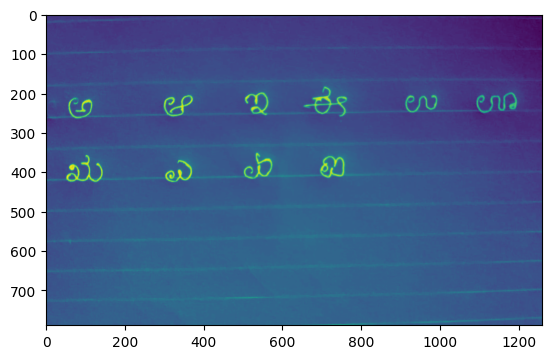

In [ ]:
plt.imshow(dst)

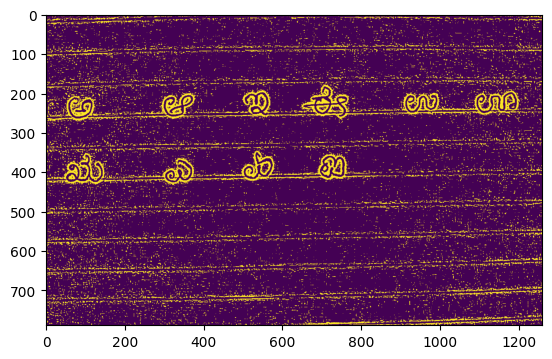

In [ ]:
thresh = cv2.adaptiveThreshold(dst, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)
plt.imshow(thresh)

In [ ]:
characters = []
min_area = 600
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_org = cv2.imread('/content/drive/MyDrive/Capstone/Input_imgs/scan_2.jpg')
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    area = w * h
    if area > min_area:
        cv2.rectangle(image_org, (x, y), (x + w, y + h), (0, 255, 0), 4)
        char = thresh[y:y+h, x:x+w]
        char = cv2.resize(char, (32, 32))
        characters.append(char)


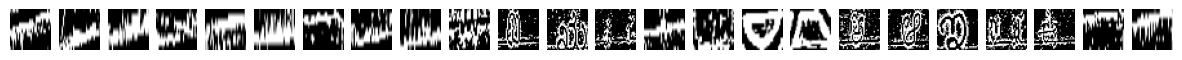

In [ ]:
fig, axes = plt.subplots(1, len(characters), figsize=(15, 5))

for i, char in enumerate(characters):
    axes[i].imshow(char, cmap='gray')
    axes[i].axis('off')

plt.show()

In [ ]:
print(f"Total extracted characters: {len(characters)}")


Total extracted characters: 13


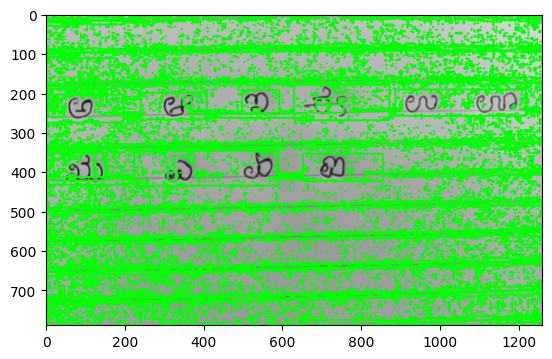

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image_org, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:

!unzip -q "/content/drive/MyDrive/Capstone/char_47.zip" -d "/content/extracted_folder"


replace /content/extracted_folder/char_47/A/c1_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/extracted_folder/char_47/A/c1_10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/extracted_folder/char_47/A/c1_100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/extracted_folder/char_47/A/c1_101.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/extracted_folder/char_47/A/c1_102.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/extracted_folder/char_47/A/c1_103.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/extracted_folder/char_47/A/c1_106.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/extracted_folder/char_47/A/c1_107.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/extracted_folder/char_47/A/c1_108.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/extracted_folder/char_47/A/c1_109.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/extracted_folder/char_47/A

CNN Model

In [ ]:
pip install --upgrade numpy tensorflow


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
dataset_path = "/content/extracted_folder/char_47"

datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_generator = datagen.flow_from_directory(
    dataset_path, target_size=(64, 64), color_mode="grayscale",
    batch_size=32, class_mode="sparse", subset="training")

val_generator = datagen.flow_from_directory(
    dataset_path, target_size=(64, 64), color_mode="grayscale",
    batch_size=32, class_mode="sparse", subset="validation")

num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")

Found 28200 images belonging to 47 classes.
Found 7050 images belonging to 47 classes.
Number of classes: 47


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a CNN model for Kannada OCR
def create_ocr_model(num_classes):
    model = keras.Sequential([
        keras.Input(shape=(64, 64, 1)),  # Input layer
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # Output layer
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_ocr_model(num_classes)
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 47)                  │          12,079 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,284,655 (4.90 MB)

 Trainable params: 1,284,655 (4.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=20, validation_data=val_generator)

# Save the trained model
model.save("kannada_ocr_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
882/882 ━━━━━━━━━━━━━━━━━━━━ 216s 243ms/step - accuracy: 0.5571 - loss: 1.6534 - val_accuracy: 0.7976 - val_loss: 0.6801
Epoch 2/20
882/882 ━━━━━━━━━━━━━━━━━━━━ 258s 239ms/step - accuracy: 0.9031 - loss: 0.3285 - val_accuracy: 0.8406 - val_loss: 0.5346
Epoch 3/20
882/882 ━━━━━━━━━━━━━━━━━━━━ 211s 240ms/step - accuracy: 0.9565 - loss: 0.1417 - val_accuracy: 0.8577 - val_loss: 0.5143
Epoch 4/20
882/882 ━━━━━━━━━━━━━━━━━━━━ 215s 244ms/step - accuracy: 0.9718 - loss: 0.0865 - val_accuracy: 0.8565 - val_loss: 0.5692
Epoch 5/20
882/882 ━━━━━━━━━━━━━━━━━━━━ 207s 235ms/step - accuracy: 0.9842 - loss: 0.0492 - val_accuracy: 0.8470 - val_loss: 0.6886
Epoch 6/20
882/882 ━━━━━━━━━━━━━━━━━━━━ 209s 237ms/step - accuracy: 0.9851 - loss: 0.0506 - val_accuracy: 0.8565 - val_loss: 0.6446
Epoch 7/20
882/882 ━━━━━━━━━━━━━━━━━━━━ 217s 246ms/step - accuracy: 0.9862 - loss: 0.0470 - val_accuracy: 0.8644 - val_loss: 0.5891
Epoch 8/20
882/882 ━━━━━━━━━━━━━━━━━━━━ 207s 234ms/step - accuracy: 0.9892 -

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    img = cv2.resize(img, (64, 64))  # Resize to a fixed shape
    img = cv2.GaussianBlur(img, (3, 3), 0)  # Apply Gaussian blur
    _, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)  # Invert & binarize
    return img / 255.0

In [ ]:
# Load the trained model
model = keras.models.load_model("kannada_ocr_model.h5")

# Test with a new image
test_img = preprocess_image("/content/extracted_folder/char_47/D/C506_52.jpg").reshape(1, 64, 64, 1)
predicted_class = np.argmax(model.predict(test_img))

# Convert prediction index to Kannada character
class_labels = list(train_generator.class_indices.keys())
print("Predicted Character:", class_labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Predicted Character: AOU


In [ ]:
test_loss, test_acc = model.evaluate(val_generator)  # Use test_generator if available
print(f"Test Accuracy: {test_acc * 100:.2f}%")


221/221 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.8658 - loss: 0.7764
Test Accuracy: 86.85%


In [ ]:
print(train_generator.class_indices)


{'A': 0, 'AA': 1, 'AI': 2, 'AOU': 3, 'B': 4, 'BH': 5, 'C': 6, 'CH': 7, 'D': 8, 'DD': 9, 'DDH': 10, 'DH': 11, 'EE': 12, 'EE1': 13, 'G': 14, 'GH': 15, 'H': 16, 'J': 17, 'JH': 18, 'JN': 19, 'JNA': 20, 'K': 21, 'KH': 22, 'L': 23, 'LH': 24, 'M': 25, 'N': 26, 'NN': 27, 'O': 28, 'OO': 29, 'P': 30, 'PH': 31, 'R': 32, 'RU': 33, 'SA': 34, 'SH': 35, 'SHH': 36, 'T': 37, 'TH': 38, 'TT': 39, 'TTH': 40, 'U': 41, 'UU': 42, 'V': 43, 'Y': 44, 'e': 45, 'e1': 46}


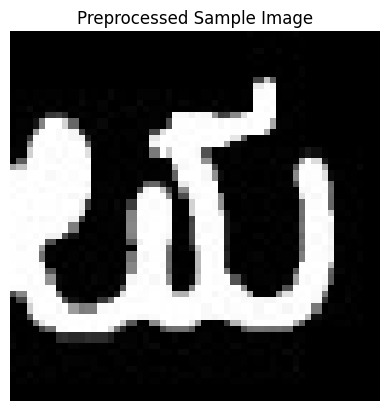

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch from the generator
sample_img, _ = next(train_generator)  # Correct way

# Show the first image in the batch
plt.imshow(sample_img[0].reshape(64, 64), cmap="gray")  # Reshape since it's grayscale
plt.title("Preprocessed Sample Image")
plt.axis("off")  # Hide axis
plt.show()
